# Implementing Decision Tree

We will try decision tree and find the R2 score, then we will try to tune our model and imporve it.
Authors:
- Nooruddin Shaikh
- Milind Sai
- Saurabh Jejurkar
- Kartik Bhargav

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv("Data/final_data.csv")
data.head()

,PM2.5,NO2,CO,SO2,O3,AQI
0,83.13,28.71,6.93,49.52,59.76,209.0
1,79.84,28.68,13.85,48.49,97.07,328.0
2,94.52,32.66,24.39,67.39,111.33,514.0
3,135.99,42.08,43.48,75.23,102.70,782.0
4,178.33,35.31,54.56,55.04,107.38,914.0


In [32]:
#Splitting Data
X = data.iloc[:, :-1] #Independent features
y = data.iloc[:, -1] #Dependent feature

#Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
#Calling and Fitting model
model = DecisionTreeRegressor(criterion="mse")
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(model.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.7801934868134524


We can clearly see model is overfitting. Let's try Cross Validation

# Cross Validation

In [35]:
score=cross_val_score(model,X,y,cv=5)
score.mean()

0.673982687715071

<AxesSubplot:xlabel='AQI', ylabel='Density'>

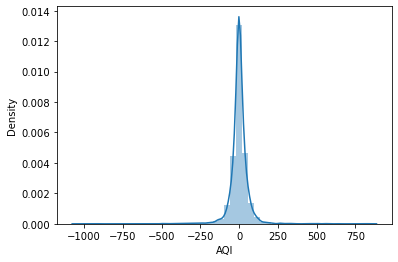

In [36]:
prediction=model.predict(X_test)
sns.distplot(y_test-prediction)

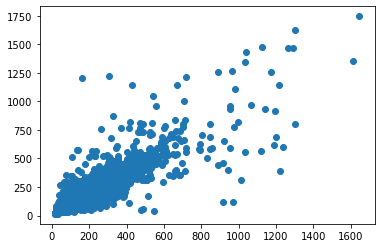

In [37]:
plt.scatter(y_test,prediction)

Even after cross validation, we are getting low accuracy. Let's tune the model and see the result.

#  Hyper Parameter Tunning

In [21]:
params={
"splitter" : ["best", "random"] ,
"max_depth" : [1, 3, 5, 7, 9, 11, 12, 15],
"min_samples_leaf" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
"min_weight_fraction_leaf":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
"max_features" : ["auto", "log2", "sqrt", None],
"max_leaf_nodes" : [None, 10, 20, 30, 40, 50, 60, 70, 80, 90] 
}

In [23]:
# Fitting GridSearchCV
random_search=GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1,cv=10, verbose=3)

In [24]:
#Using time function to calculate total time taken for tunning
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [26]:
start_time = timer(None)
random_search.fit(X,y)
timer(start_time)

Fitting 10 folds for each of 57600 candidates, totalling 576000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 3160 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 5464 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 8280 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 11608 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 15448 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 19800 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 24664 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 30040 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 35928 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 42328 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 49240 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 56664 t


 Time taken: 0 hours 17 minutes and 7.56 seconds.


In [27]:
#Printing Best Parameters and Score
print(random_search.best_params_)
print(random_search.best_score_)

{'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 90, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
-10243.184259141926


<AxesSubplot:xlabel='AQI', ylabel='Density'>

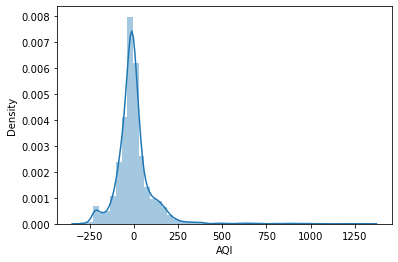

In [38]:
tuned_pred=random_search.predict(X_test)
sns.distplot(y_test-tuned_pred)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 64.15941645599406
MSE: 11075.04197070183
RMSE: 105.23802530787923


In [31]:
r2_score(y_test, prediction)

0.7729611199660684

# Insights
- Even after tunning, we are not getting high accuracy.
- MSE is too high which is making model dumb